In [2]:
import torch
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 
sig = torch.nn.Sigmoid()
soft = torch.nn.Softmax(dim=1)
tanh = torch.nn.Tanh()

# 순환신경망 표현력 비교실험 (1)

## data: abcabC

In [4]:
txt = list('abcabC')*100
txt[:8]
txt_x = txt[:-1] 
txt_y = txt[1:]

In [5]:
mapping = {'a':0,'b':1,'c':2,'C':3} 
x= torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float()
y= torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float()

In [6]:
x = x.to("cuda:0")
y = y.to("cuda:0") 

In [7]:
x.shape

torch.Size([599, 4])

## 실험

`-` 실험1

In [9]:
HIDDEN = 3

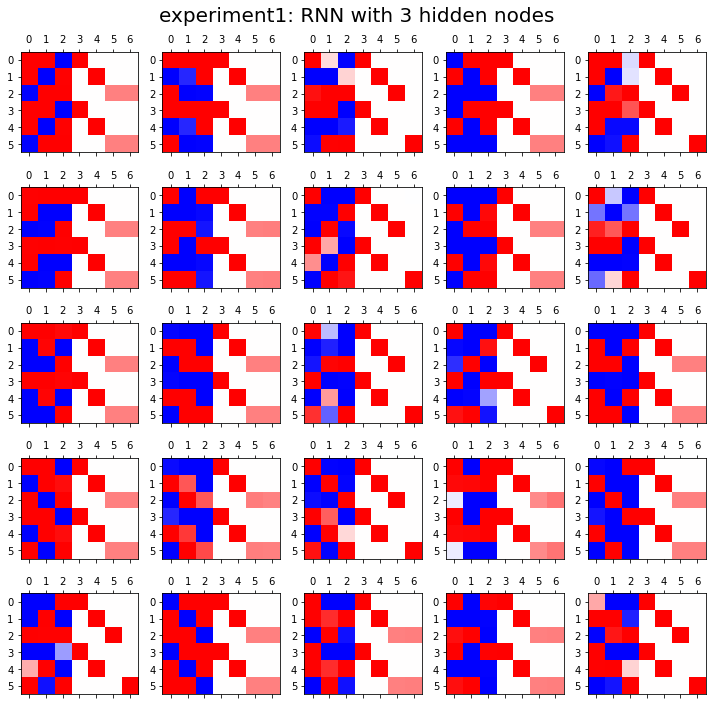

In [10]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment1: RNN with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

`-` 실험2

In [11]:
HIDDEN = 4

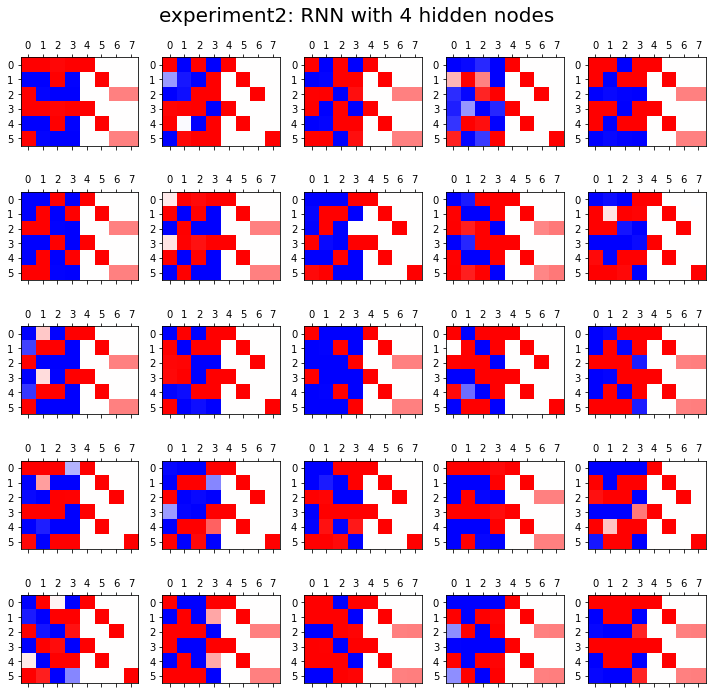

In [12]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment2: RNN with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

`-` 실험3

In [13]:
HIDDEN = 8

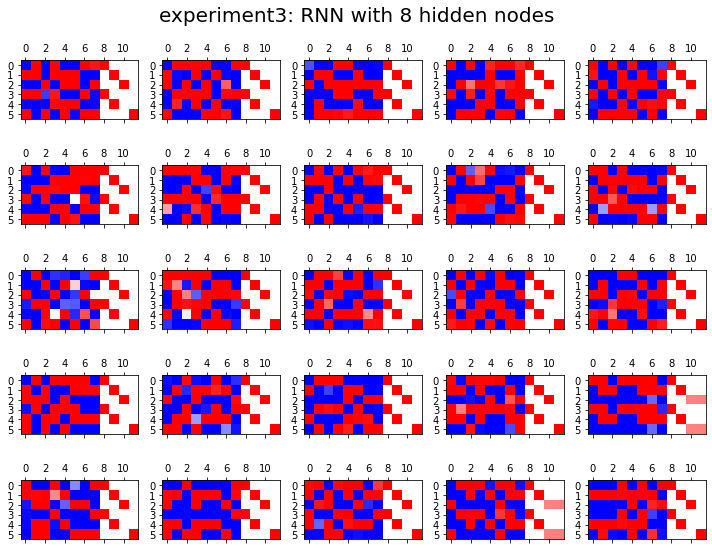

In [14]:
fig, ax = plt.subplots(5,5,figsize=(10,8))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment3: RNN with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

## 결론

`-` 노드수가 많으면 학습에 유리함 

# 순환신경망 표현력 비교실험 (2)

## data: ab(c,C)

In [1064]:
# torch.manual_seed(43052)
# txta = 'a'*50
# txtb = 'b'*50
# prob_upper = torch.bernoulli(torch.zeros(50)+0.5) 
# txtc = list(map(lambda x: 'c' if x==1 else 'C', prob_upper))
# txt = ''.join([txta[i]+','+txtb[i]+','+txtc[i]+',' for i in range(50)]).split(',')[:-1]
# txt_x = txt[:-1] 
# txt_y = txt[1:]
# pd.DataFrame({'txt_x':txt_x,'txt_y':txt_y}).to_csv("2022-11-25-ab(c,C).csv",index=False)

In [18]:
df= pd.read_csv("2022-11-25-ab(c,C).csv")
df

,txt_x,txt_y
0,a,b
1,b,c
2,c,a
3,a,b
4,b,c
...,...,...
144,a,b
145,b,C
146,C,a
147,a,b


In [19]:
mapping = {'a':0,'b':1,'c':2,'C':3} 
x= torch.nn.functional.one_hot(torch.tensor(f(df.txt_x,mapping))).float()
y= torch.nn.functional.one_hot(torch.tensor(f(df.txt_y,mapping))).float()

In [20]:
x = x.to("cuda:0")
y = y.to("cuda:0") 

## 실험

`-` 실험1

In [21]:
HIDDEN = 3

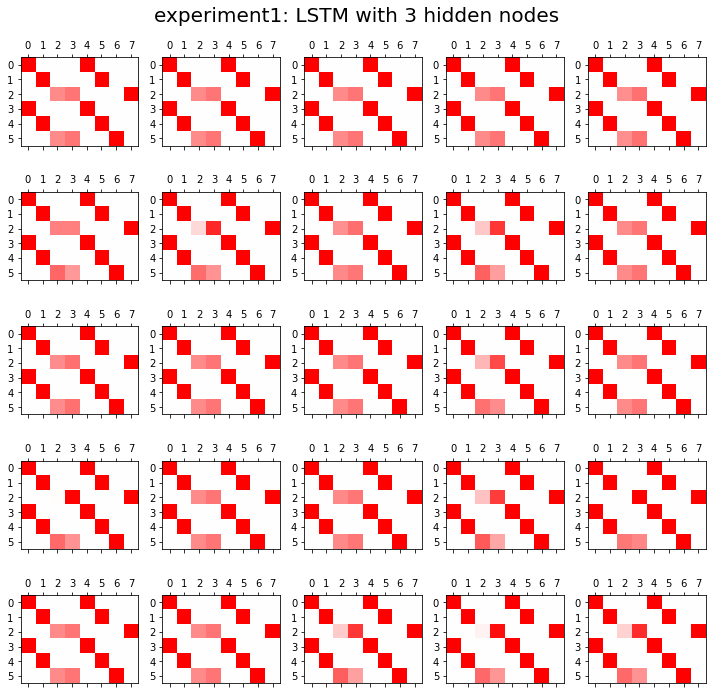

In [22]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        lstm = torch.nn.LSTM(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, (hT,cT) = lstm(x,(_water,_water))
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combinded = torch.concat([yhat,y],axis=1)
        ax[i][j].matshow(combinded.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment1: LSTM with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

`-` 실험2

In [24]:
HIDDEN = 16

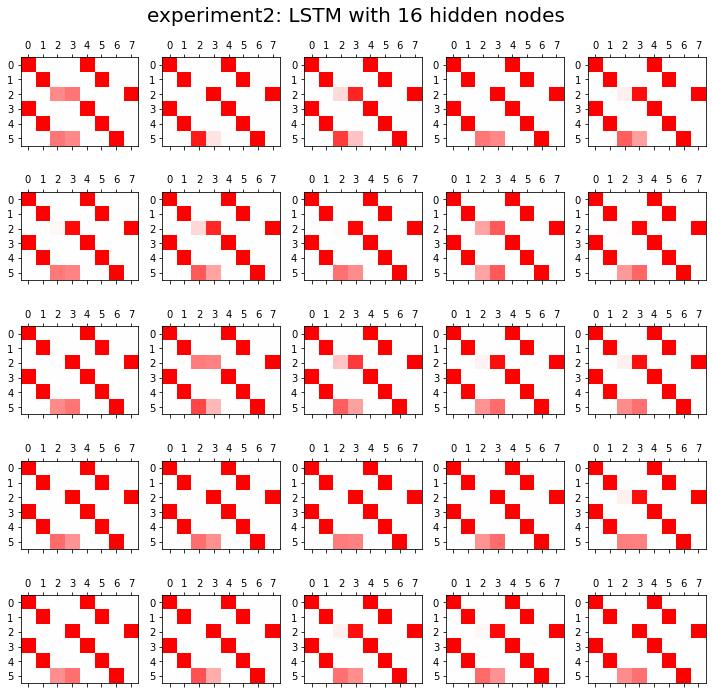

In [25]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        lstm = torch.nn.LSTM(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, (hT,cT) = lstm(x,(_water,_water))
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combinded = torch.concat([yhat,y],axis=1)
        ax[i][j].matshow(combinded.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment2: LSTM with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

## 결론

`-` 노드수가 너무 많으면 오버피팅 경향도 있음 

# 문자열에서 단어로

## data: human numbers 5

In [26]:
txt = (['one',',','two',',','three',',','four',',','five',',']*100)[:-1]

In [28]:
mapping = {',': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}

In [29]:
txt_x = txt[:-1] 
txt_y = txt[1:]

In [30]:
x= torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float()
y= torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float()

In [33]:
x = x.to("cuda:0")
y = y.to("cuda:0") 

## torch를 이용한 learn

In [34]:
HIDDEN = 20

In [35]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(6,HIDDEN).to("cuda:0")
linr = torch.nn.Linear(HIDDEN,6).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
_water = torch.zeros(1,HIDDEN).to("cuda:0")
for epoc in range(500):
    ## 1
    hidden, (hT,cT) = lstm(x,(_water,_water))
    output = linr(hidden)
    ## 2
    loss = loss_fn(output,y)
    ## 3
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [36]:
soft(output).data[-10:].to("cpu")

tensor([[9.9999e-01, 3.9119e-06, 3.0788e-08, 5.8943e-06, 8.8143e-09, 1.3331e-07],
        [8.5938e-08, 9.9985e-01, 6.4028e-05, 3.1530e-05, 6.9832e-06, 4.5028e-05],
        [9.9999e-01, 7.3703e-08, 1.2404e-06, 1.9506e-07, 1.1338e-06, 8.8255e-06],
        [1.9159e-08, 2.4035e-07, 9.9997e-01, 6.6191e-06, 8.3475e-06, 1.1663e-05],
        [1.0000e+00, 5.3941e-08, 7.1640e-08, 5.5608e-07, 7.2524e-08, 8.5960e-08],
        [1.6338e-07, 4.2633e-05, 3.8213e-05, 9.9990e-01, 4.0797e-09, 2.3639e-05],
        [9.9999e-01, 4.6589e-08, 5.8341e-10, 1.2804e-07, 7.0116e-06, 3.6203e-07],
        [3.1322e-06, 6.1328e-06, 1.2816e-05, 6.0362e-10, 9.9997e-01, 1.2343e-05],
        [9.9999e-01, 8.8293e-08, 1.0380e-06, 3.5568e-07, 3.3849e-06, 2.7604e-06],
        [8.2612e-08, 1.1319e-04, 1.1417e-05, 7.7150e-06, 3.7089e-06, 9.9986e-01]])

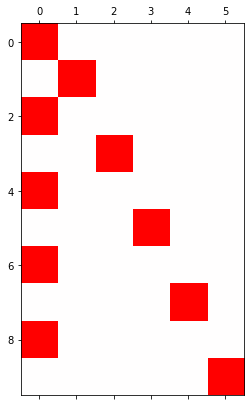

In [41]:
plt.matshow(soft(output).data[-10:].to("cpu"),cmap='bwr',vmin=-1,vmax=1)

## fastai를 이용한 learn 

In [46]:
from fastai.text.all import *

In [47]:
ds1 = torch.utils.data.TensorDataset(x,y)
ds2 = torch.utils.data.TensorDataset(x,y) # dummy 
dl1 = torch.utils.data.DataLoader(ds1,batch_size=8) 
dl2 = torch.utils.data.DataLoader(ds2,batch_size=8) # dummy
dls = DataLoaders(dl1,dl2) 

In [61]:
class MyLSTM(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = torch.nn.LSTM(6,HIDDEN)
        self.linr = torch.nn.Linear(HIDDEN,6)
    def forward(self,x):
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        hidden, (hT,cT)  = self.lstm(x,(_water,_water))
        output = self.linr(hidden) 
        return output

In [62]:
net = MyLSTM()
loss_fn = torch.nn.CrossEntropyLoss()

In [64]:
lrnr = Learner(dls,net,loss_fn)

In [65]:
lrnr.fit(10)

epoch,train_loss,valid_loss,time
0,1.552394,1.481384,00:00
1,1.142831,0.923131,00:00
2,0.758790,0.630345,00:00
3,0.446162,0.338486,00:00
4,0.227327,0.159498,00:00
5,0.104717,0.072119,00:00
6,0.048809,0.034304,00:00
7,0.023731,0.017093,00:00
8,0.012051,0.008876,00:00
9,0.006350,0.004759,00:00


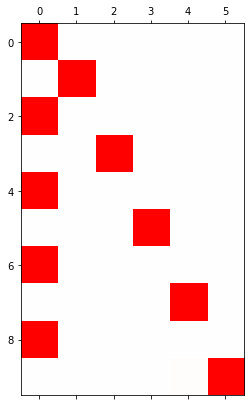

In [69]:
plt.matshow(soft(lrnr.model(x)).data.to("cpu")[-10:],cmap='bwr',vmin=-1,vmax=1)

# 숙제